In [22]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(13)

import tensorflow as tf 
import pandas as pd
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10 # class size
input_unit_size = 28*28 # input vector size

In [24]:
x_train = x_train.reshape(x_train.shape[0], input_unit_size)
x_test  = x_test.reshape(x_test.shape[0], input_unit_size)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

# one-hot representation
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [33]:
#1. Create the model
model = Sequential()

#2. Setup the hiddenlayers

#The first layer: we set 128 neurons in the first layer and activation function to be relu.
#Besides, because the first layer will input the input data, we need to tell Keras what's the dimension of the input vector
model.add(Dense(128, input_dim=input_unit_size, activation='relu'))
model.add(Dropout(rate=0.2)) #Dropout rate is used to avoid overfitting. 0.2 means that 20% of the neurons will be forced to be 0

#The second layer: we set 50 neurons and activation function to be rely
model.add(Dense(50, activation='relu'))
model.add(Dropout(rate=0.2)) #Dropout rate is used to avoid overfitting. 0.2 means that 20% of the neurons will be forced to be 0

#3. Setup the final layer
#The last layer: because it's a multi-class classification problem, we will use softmax
#Because this is the last layer, the number of neurons equals to the number of y
model.add(Dense(num_classes, activation='softmax'))

In [36]:
#4. Setup the loss function
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

#5. Fit the model
result = model.fit(x_train, y_train, epochs=50, batch_size=256, verbose=2,  validation_split=0.15)

Epoch 1/50
200/200 - 1s - loss: 1.8438 - accuracy: 0.5142 - val_loss: 1.7767 - val_accuracy: 0.6110 - 718ms/epoch - 4ms/step
Epoch 2/50
200/200 - 0s - loss: 1.8226 - accuracy: 0.5244 - val_loss: 1.7519 - val_accuracy: 0.6222 - 368ms/epoch - 2ms/step
Epoch 3/50
200/200 - 0s - loss: 1.7991 - accuracy: 0.5355 - val_loss: 1.7262 - val_accuracy: 0.6332 - 359ms/epoch - 2ms/step
Epoch 4/50
200/200 - 0s - loss: 1.7732 - accuracy: 0.5491 - val_loss: 1.6999 - val_accuracy: 0.6430 - 358ms/epoch - 2ms/step
Epoch 5/50
200/200 - 0s - loss: 1.7505 - accuracy: 0.5591 - val_loss: 1.6731 - val_accuracy: 0.6531 - 359ms/epoch - 2ms/step
Epoch 6/50
200/200 - 0s - loss: 1.7250 - accuracy: 0.5682 - val_loss: 1.6461 - val_accuracy: 0.6638 - 357ms/epoch - 2ms/step
Epoch 7/50
200/200 - 0s - loss: 1.6997 - accuracy: 0.5815 - val_loss: 1.6189 - val_accuracy: 0.6727 - 358ms/epoch - 2ms/step
Epoch 8/50
200/200 - 0s - loss: 1.6755 - accuracy: 0.5868 - val_loss: 1.5915 - val_accuracy: 0.6816 - 358ms/epoch - 2ms/step


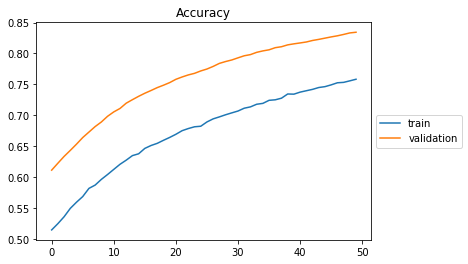

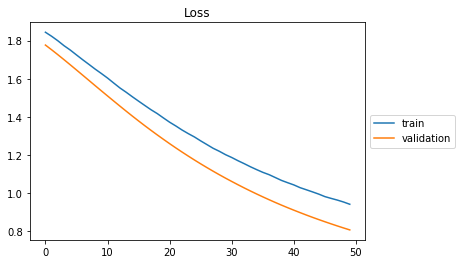

In [37]:
x = range(50)
plt.plot(x, result.history['accuracy'], label='train')
plt.plot(x, result.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, result.history['loss'], label='train')
plt.plot(x, result.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))